## 1、降维技术

对数据的简化有如下几个原因：

* 使得数据集更易使用

* 降低很多算法的计算开销

* 去除噪声

* 是的结果易懂

在已标注和未标注的数据上都有降维技术，这里重点关注未标注数据上的降维。

1. 第一种降维的方法称为主成分分析（principal component analysis, PCA）

2. 第二种方法是因子分析（factor analysis）

3. 第三种技术及时独立成分分析（independent component analysis， ICA）

## 2、 PCA

> 优点：降低数据的复杂性，识别最重要的多个特征

> 缺点：不一定需要，且有可能损失有用信息

> 适用数据类型：数值型数据

In [1]:
import numpy as np

In [2]:
def loadDataSet(fileName, delim='\t'):
    with open(fileName) as f:
        stringArr = [line.strip().split(delim) for line in f.readlines()]
        datArr = [list(map(float, line)) for line in stringArr]
        return np.mat(datArr)

In [3]:
def pca(dataMat, topNfeat=9999999):
    # 去平均值
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = np.cov(meanRemoved, rowvar=0)
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))
    # 从小到大排序
    eigValInd = np.argsort(eigVals)
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    redEigVects = eigVects[:, eigValInd]
    lowDDataMat = meanRemoved * redEigVects
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

In [12]:
dataMat = loadDataSet('testSet.txt')
lowDMat, reconMat = pca(dataMat, 1)

In [13]:
lowDMat.shape

(1000, 1)

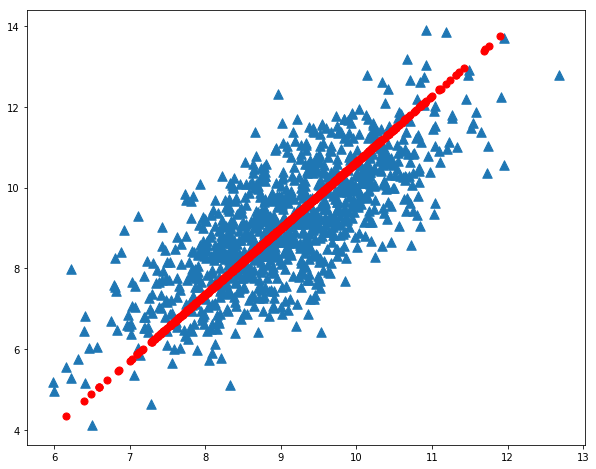

In [15]:
# plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(dataMat[:, 0].flatten().A[0], dataMat[:, 1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:, 0].flatten().A[0], reconMat[:, 1].flatten().A[0], marker='o', s=50, c='r')
plt.show()

## 3、示例：利用PCA对半导体制造数据降维

In [7]:
# 将NaN替换成平均值的函数
def replaceNanWithMean():
    datMat = loadDataSet('secom.data', ' ')
    numFeat = datMat.shape[1]
    for i in range(numFeat):
        meanVal = np.mean(datMat[np.nonzero(~np.isnan(datMat[:, i].A))[0], i])
        datMat[np.nonzero(np.isnan(datMat[:, i].A))[0], i] = meanVal
    return datMat

In [8]:
dataMat = replaceNanWithMean()
dataMat

matrix([[  3.03093000e+03,   2.56400000e+03,   2.18773330e+03, ...,
           1.64749042e-02,   5.28333333e-03,   9.96700663e+01],
        [  3.09578000e+03,   2.46514000e+03,   2.23042220e+03, ...,
           2.01000000e-02,   6.00000000e-03,   2.08204500e+02],
        [  2.93261000e+03,   2.55994000e+03,   2.18641110e+03, ...,
           4.84000000e-02,   1.48000000e-02,   8.28602000e+01],
        ..., 
        [  2.97881000e+03,   2.37978000e+03,   2.20630000e+03, ...,
           8.60000000e-03,   2.50000000e-03,   4.35231000e+01],
        [  2.89492000e+03,   2.53201000e+03,   2.17703330e+03, ...,
           2.45000000e-02,   7.50000000e-03,   9.34941000e+01],
        [  2.94492000e+03,   2.45076000e+03,   2.19544440e+03, ...,
           1.62000000e-02,   4.50000000e-03,   1.37784400e+02]])

In [9]:
meanVals = np.mean(dataMat, axis=0)
meanRemoved = dataMat - meanVals
covMat = np.cov(meanRemoved, rowvar=0)
eigVals, eigVects = np.linalg.eig(np.mat(covMat))
eigVals

array([  5.34151979e+07,   2.17466719e+07,   8.24837662e+06,
         2.07388086e+06,   1.31540439e+06,   4.67693557e+05,
         2.90863555e+05,   2.83668601e+05,   2.37155830e+05,
         2.08513836e+05,   1.96098849e+05,   1.86856549e+05,
         1.52422354e+05,   1.13215032e+05,   1.08493848e+05,
         1.02849533e+05,   1.00166164e+05,   8.33473762e+04,
         8.15850591e+04,   7.76560524e+04,   6.66060410e+04,
         6.52620058e+04,   5.96776503e+04,   5.16269933e+04,
         5.03324580e+04,   4.54661746e+04,   4.41914029e+04,
         4.15532551e+04,   3.55294040e+04,   3.31436743e+04,
         2.67385181e+04,   1.47123429e+04,   1.44089194e+04,
         1.09321187e+04,   1.04841308e+04,   9.48876548e+03,
         8.34665462e+03,   7.22765535e+03,   5.34196392e+03,
         4.95614671e+03,   4.23060022e+03,   4.10673182e+03,
         3.41199406e+03,   3.24193522e+03,   2.74523635e+03,
         2.35027999e+03,   2.16835314e+03,   1.86414157e+03,
         1.76741826e+03,

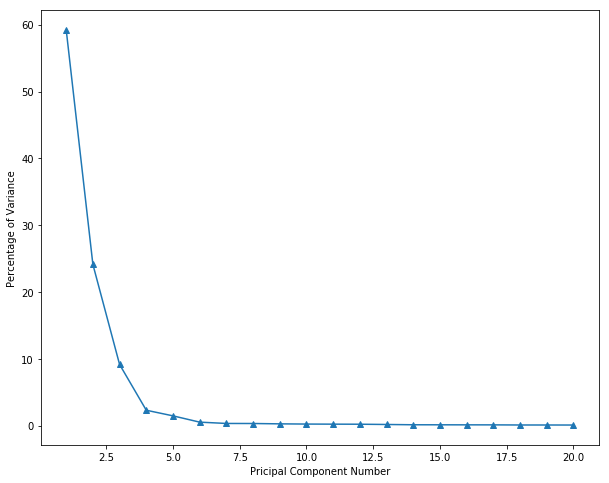

In [16]:
eigValInd = np.argsort(eigVals)
eigValInd = eigValInd[::-1] # reverse
sortedEigVals = eigVals[eigValInd]
total = np.sum(sortedEigVals)
varPercentage = sortedEigVals/total*100

# plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(range(1, 21), varPercentage[:20], marker='^')
plt.xlabel('Pricipal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

可以看出前六个主成分就已经涵盖了数据绝大部分的特征

> 总结：降维技术使得数据变得更易使用，并且它们往往能够去除数据中的噪声，使得其他机器学习人物更加精确。降维往往作为预处理步骤，在数据应用到其他算法之前清洗数据。